In [63]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

In [64]:
data = pd.read_csv(r"C:\Users\nipun dingra\Downloads\WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [65]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [66]:
data.shape

(7043, 21)

In [67]:
data.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [68]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [69]:
data['SeniorCitizen'].replace({0 :'NO', 1:'Yes'},inplace = True)

In [70]:
data['TotalCharges'] = data['TotalCharges'].replace(' ',0.0)

In [71]:
data['TotalCharges'] = data['TotalCharges'].astype("float")

In [72]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,NO,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,NO,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,NO,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,NO,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,NO,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [73]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   object 
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [74]:
data.SeniorCitizen.value_counts()

NO     5901
Yes    1142
Name: SeniorCitizen, dtype: int64

In [75]:
data.drop('customerID' , axis = 1, inplace = True)

In [76]:
#data['TotalCharges'] =pd.to_numeric(data.TotalCharges , errors = 'coerce' )

In [77]:
num_cols=data.select_dtypes(include = np.number).columns

In [78]:
cat_cols=data.select_dtypes(include = 'object').columns

## univariate analysis

## boxplot

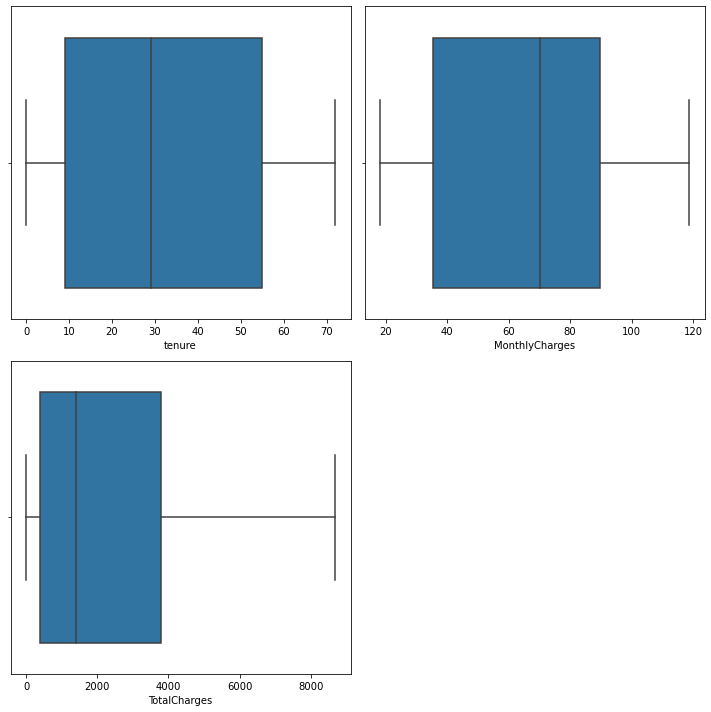

In [79]:
plt.figure(figsize=(10,10))
r = 2
c=2
it=1
for i in num_cols:
    plt.subplot(r,c , it)
    sns.boxplot(data.loc[:,i])
    it = it + 1
    
plt.tight_layout()
plt.show()


## countplot

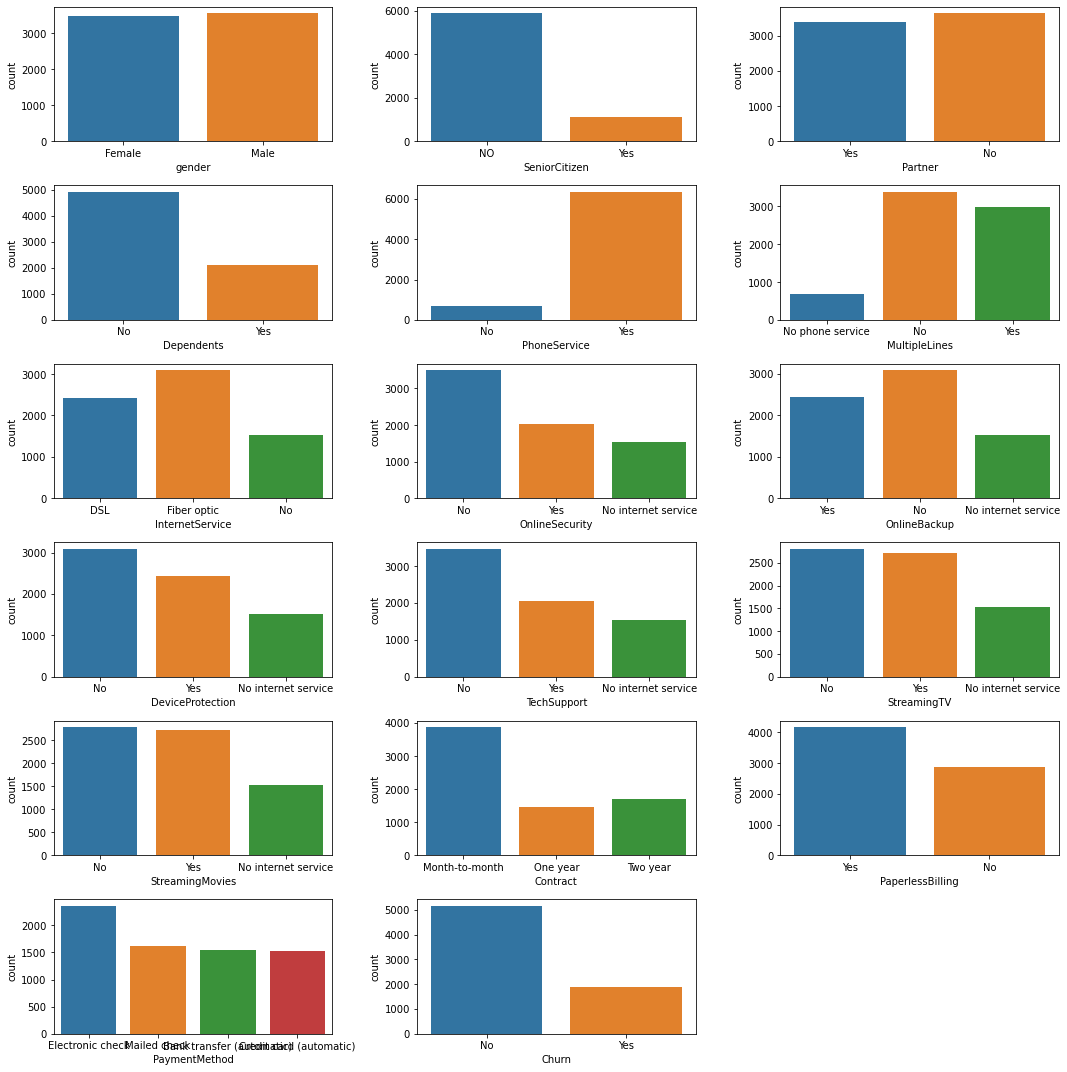

In [80]:
plt.figure(figsize=(15,15))
r = 6
c=3
it = 1
for i in cat_cols:
    plt.subplot( r,c,it)
    sns.countplot(data.loc[:,i])
    it = it + 1
plt.tight_layout()
plt.show()

In [81]:
data.isnull().sum()

gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# bivarate analysis

In [82]:
num_cols

Index(['tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

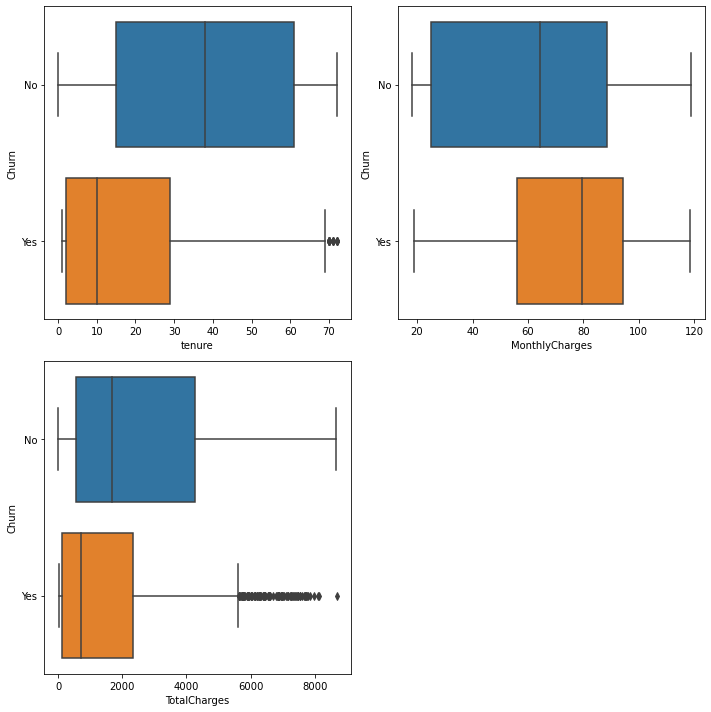

In [83]:
plt.figure(figsize=(10,10))
r = 2
c=2
it=1
for i in num_cols:
    plt.subplot(r,c , it)
    sns.boxplot(data.loc[:,i],data.loc[:,'Churn'])
    it = it + 1
    
plt.tight_layout()
plt.show()


## countplot

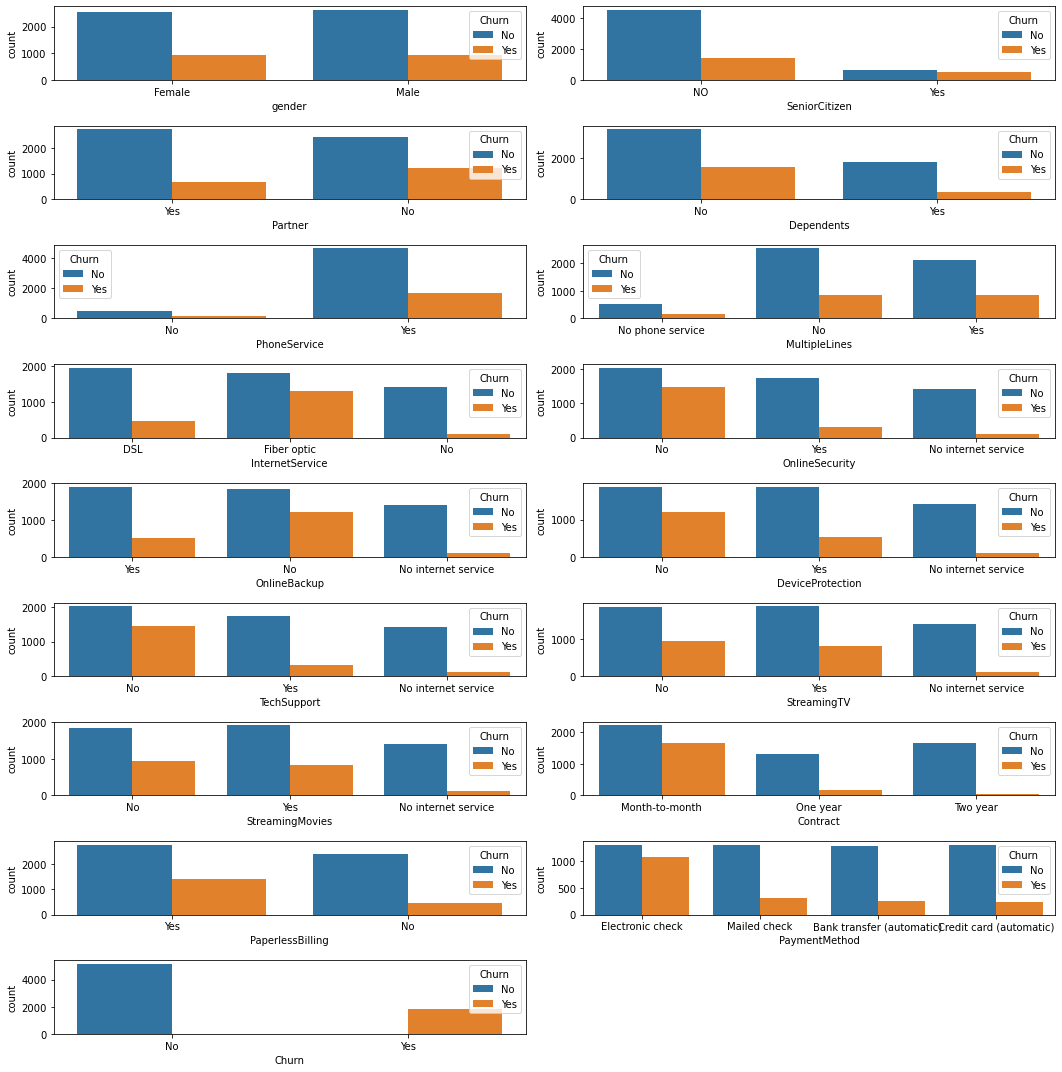

In [84]:
plt.figure(figsize=(15,15))
r = 9
c=2
it = 1
for i in cat_cols:
    plt.subplot( r,c,it)
    sns.countplot(data.loc[:,i] ,hue =data.loc[:,'Churn'])
    it = it + 1
plt.tight_layout()
plt.show()

<AxesSubplot:>

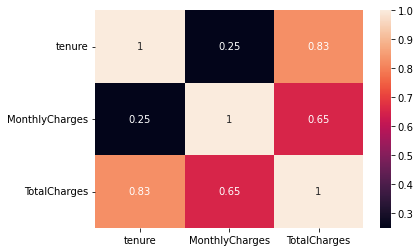

In [85]:
sns.heatmap(data.corr(), annot = True )

In [86]:
data.skew()

tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.963235
dtype: float64

In [87]:
from sklearn.preprocessing import  StandardScaler

In [88]:
sc = StandardScaler()

In [89]:
for i in num_cols:
    data[i]= sc.fit_transform(pd.DataFrame(data[i]))

In [90]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,NO,Yes,No,-1.277445,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,-0.992611,No
1,Male,NO,No,No,0.066327,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.259629,-0.172165,No
2,Male,NO,No,No,-1.236724,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.958066,Yes
3,Male,NO,No,No,0.514251,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,-0.193672,No
4,Female,NO,No,No,-1.236724,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,-0.938874,Yes


In [91]:
data.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

In [92]:
data.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

In [93]:
data.MultipleLines.value_counts()

No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64

## converting multiple lines

In [94]:
a = ['NO' ,'No phone service']

In [95]:
def func(x):
    if x in a:
        return('NO')
    else:
        return('Yes')

In [96]:
data['MultipleLines'] = data['MultipleLines'].apply(func)

In [97]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,NO,Yes,No,-1.277445,No,NO,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,-0.992611,No
1,Male,NO,No,No,0.066327,Yes,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.259629,-0.172165,No
2,Male,NO,No,No,-1.236724,Yes,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.958066,Yes
3,Male,NO,No,No,0.514251,No,NO,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,-0.193672,No
4,Female,NO,No,No,-1.236724,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,-0.938874,Yes


In [98]:
data.MultipleLines.value_counts()

Yes    6361
NO      682
Name: MultipleLines, dtype: int64

In [99]:
data.OnlineSecurity.value_counts()

No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64

In [100]:
a = ['No','No internet service']

In [101]:
def func1(x):
    if x in a:
        return('NO')
    else:
        return('Yes')

In [102]:
data['OnlineSecurity'] = data['OnlineSecurity'].apply(func1)

In [103]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,NO,Yes,No,-1.277445,No,NO,DSL,NO,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,-0.992611,No
1,Male,NO,No,No,0.066327,Yes,Yes,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,-0.259629,-0.172165,No
2,Male,NO,No,No,-1.236724,Yes,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.958066,Yes
3,Male,NO,No,No,0.514251,No,NO,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,-0.193672,No
4,Female,NO,No,No,-1.236724,Yes,Yes,Fiber optic,NO,No,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,-0.938874,Yes


In [104]:
data.OnlineSecurity.value_counts()

NO     5024
Yes    2019
Name: OnlineSecurity, dtype: int64

## converting online backup

In [105]:
data.OnlineBackup.value_counts()

No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64

In [106]:
a = ['No','No internet service']

In [107]:
def func2(x):
    if x in a:
        return('NO')
    else:
        return('Yes')

In [108]:
data['OnlineBackup'] = data['OnlineBackup'].apply(func2)

In [109]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,NO,Yes,No,-1.277445,No,NO,DSL,NO,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,-1.160323,-0.992611,No
1,Male,NO,No,No,0.066327,Yes,Yes,DSL,Yes,NO,Yes,No,No,No,One year,No,Mailed check,-0.259629,-0.172165,No
2,Male,NO,No,No,-1.236724,Yes,Yes,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,-0.362660,-0.958066,Yes
3,Male,NO,No,No,0.514251,No,NO,DSL,Yes,NO,Yes,Yes,No,No,One year,No,Bank transfer (automatic),-0.746535,-0.193672,No
4,Female,NO,No,No,-1.236724,Yes,Yes,Fiber optic,NO,NO,No,No,No,No,Month-to-month,Yes,Electronic check,0.197365,-0.938874,Yes


In [110]:
data.OnlineBackup.value_counts()

NO     4614
Yes    2429
Name: OnlineBackup, dtype: int64

## converting device protection

In [111]:
data.DeviceProtection.value_counts()

No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64

In [112]:
a = ['No','No internet service']

In [113]:
def func3(x):
    if x in a:
        return('NO')
    else:
        return('Yes')

In [114]:
data['DeviceProtection'] = data['DeviceProtection'].apply(func3)

In [115]:
data.DeviceProtection.value_counts()

NO     4621
Yes    2422
Name: DeviceProtection, dtype: int64

## converting TechSupport

In [116]:
data.TechSupport.value_counts()

No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64

In [117]:
a = ['No','No internet service']

In [118]:
def func4(x):
    if x in a:
        return('NO')
    else:
        return('Yes')

In [119]:
data['TechSupport'] = data['TechSupport'].apply(func4)

In [120]:
data.TechSupport.value_counts()

NO     4999
Yes    2044
Name: TechSupport, dtype: int64

## converting streaming movies

In [121]:
data.StreamingMovies.value_counts()

No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64

In [122]:
a = ['No','No internet service']

In [123]:
def func5(x):
    if x in a:
        return('NO')
    else:
        return('Yes')

In [124]:
data['StreamingMovies'] = data['StreamingMovies'].apply(func5)

In [125]:
data.StreamingMovies.value_counts()

NO     4311
Yes    2732
Name: StreamingMovies, dtype: int64

## converting  StreamingTV	

In [126]:
data.StreamingTV.value_counts()

No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64

In [127]:
a = ['No','No internet service']

In [128]:
def func6(x):
    if x in a:
        return('NO')
    else:
        return('Yes')

In [129]:
data['StreamingTV'] = data['StreamingTV'].apply(func6)

In [130]:
data.StreamingTV.value_counts()

NO     4336
Yes    2707
Name: StreamingTV, dtype: int64

In [131]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,NO,Yes,No,-1.277445,No,NO,DSL,NO,Yes,NO,NO,NO,NO,Month-to-month,Yes,Electronic check,-1.160323,-0.992611,No
1,Male,NO,No,No,0.066327,Yes,Yes,DSL,Yes,NO,Yes,NO,NO,NO,One year,No,Mailed check,-0.259629,-0.172165,No
2,Male,NO,No,No,-1.236724,Yes,Yes,DSL,Yes,Yes,NO,NO,NO,NO,Month-to-month,Yes,Mailed check,-0.362660,-0.958066,Yes
3,Male,NO,No,No,0.514251,No,NO,DSL,Yes,NO,Yes,Yes,NO,NO,One year,No,Bank transfer (automatic),-0.746535,-0.193672,No
4,Female,NO,No,No,-1.236724,Yes,Yes,Fiber optic,NO,NO,NO,NO,NO,NO,Month-to-month,Yes,Electronic check,0.197365,-0.938874,Yes


In [132]:
data.Contract.value_counts()

Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64

In [133]:
data.PaymentMethod.value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

In [136]:
c = ['Electronic check' , 'Mailed check']

In [137]:
def func7(x):
    if x in c:
        return('check')
    else:
        return('automatic')

In [138]:
data['PaymentMethod'] = data['PaymentMethod'].apply(func7)

In [139]:
data.PaymentMethod.value_counts()

check        3977
automatic    3066
Name: PaymentMethod, dtype: int64

In [140]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,NO,Yes,No,-1.277445,No,NO,DSL,NO,Yes,NO,NO,NO,NO,Month-to-month,Yes,check,-1.160323,-0.992611,No
1,Male,NO,No,No,0.066327,Yes,Yes,DSL,Yes,NO,Yes,NO,NO,NO,One year,No,check,-0.259629,-0.172165,No
2,Male,NO,No,No,-1.236724,Yes,Yes,DSL,Yes,Yes,NO,NO,NO,NO,Month-to-month,Yes,check,-0.362660,-0.958066,Yes
3,Male,NO,No,No,0.514251,No,NO,DSL,Yes,NO,Yes,Yes,NO,NO,One year,No,automatic,-0.746535,-0.193672,No
4,Female,NO,No,No,-1.236724,Yes,Yes,Fiber optic,NO,NO,NO,NO,NO,NO,Month-to-month,Yes,check,0.197365,-0.938874,Yes


In [141]:
data.InternetService.value_counts()

Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64

## encoding

In [142]:
from sklearn.preprocessing import LabelEncoder

In [143]:
le=LabelEncoder()

In [144]:
cat_cols=data.select_dtypes(include='object').columns
cat_cols

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [145]:
for i in cat_cols:
    data[i]=le.fit_transform(pd.DataFrame(data[i]))

In [146]:
data.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,-1.277445,0,0,0,0,1,0,0,0,0,0,1,1,-1.160323,-0.992611,0
1,1,0,0,0,0.066327,1,1,0,1,0,1,0,0,0,1,0,1,-0.259629,-0.172165,0
2,1,0,0,0,-1.236724,1,1,0,1,1,0,0,0,0,0,1,1,-0.362660,-0.958066,1
3,1,0,0,0,0.514251,0,0,0,1,0,1,1,0,0,1,0,0,-0.746535,-0.193672,0
4,0,0,0,0,-1.236724,1,1,1,0,0,0,0,0,0,0,1,1,0.197365,-0.938874,1


  ## now applying models

# logit

In [160]:
from statsmodels.api import Logit

In [161]:
x = data.drop('Churn' , axis=1)
y = data['Churn']

In [162]:
from sklearn.model_selection import train_test_split

In [163]:
x_train , x_test , y_train , y_test = train_test_split(x , y , train_size=0.70 , random_state=10) 

In [164]:
import statsmodels.api as sma

In [165]:
# adding constant
X_train = sma.add_constant(x_train)
X_test = sma.add_constant(x_test)

In [166]:
# base model
base_model = Logit(y_train , X_train).fit()

Optimization terminated successfully.
         Current function value: 0.414446
         Iterations 8


In [167]:
base_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                  Churn   No. Observations:                 4930
Model:                          Logit   Df Residuals:                     4911
Method:                           MLE   Df Model:                           18
Date:                Fri, 30 Dec 2022   Pseudo R-squ.:                  0.2847
Time:                        00:44:11   Log-Likelihood:                -2043.2
converged:                       True   LL-Null:                       -2856.3
Covariance Type:            nonrobust   LLR p-value:                     0.000
====================================================================================
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const                0.2083      0.220      0.945      0.345      -0.224       0.640
gender              -0.0565      0.077     -0.729      0.466      -0.208       0.095
SeniorCitizen        0.1802      0.101      1.787      0.074      -0.017       0.378
Partner             -0.0125      0.092     -0.136      0.892      -0.193       0.168
Dependents          -0.0929      0.106     -0.877      0.380      -0.301       0.115
tenure              -1.1889      0.178     -6.673      0.000      -1.538      -0.840
PhoneService        -0.6087   2.89e+06  -2.11e-07      1.000   -5.66e+06    5.66e+06
MultipleLines       -0.6087   2.89e+06  -2.11e-07      1.000   -5.66e+06    5.66e+06
InternetService     -0.0446      0.077     -0.581      0.561      -0.195       0.106
OnlineSecurity      -0.6705      0.103     -6.536      0.000      -0.872      -0.469
OnlineBackup        -0.4068      0.094     -4.332      0.000      -0.591      -0.223
DeviceProtection    -0.2053      0.095     -2.151      0.032      -0.392      -0.018
TechSupport         -0.5484      0.102     -5.360      0.000      -0.749      -0.348
StreamingTV         -0.2367      0.102     -2.315      0.021      -0.437      -0.036
StreamingMovies     -0.0753      0.102     -0.736      0.462      -0.276       0.125
Contract            -0.6964      0.092     -7.586      0.000      -0.876      -0.516
PaperlessBilling     0.4526      0.089      5.102      0.000       0.279       0.627
PaymentMethod        0.2633      0.086      3.046      0.002       0.094       0.433
MonthlyCharges       1.0947      0.090     12.155      0.000       0.918       1.271
TotalCharges         0.4853      0.187      2.598      0.009       0.119       0.852
====================================================================================
"""

In [179]:
from sklearn.metrics import accuracy_score ,auc , cohen_kappa_score ,confusion_matrix , precision_score , classification_report , f1_score , recall_score 

In [180]:
def scores(actual,predicted):
    print('Confusion Metrics:\n',confusion_matrix(actual,predicted))
    print('Accuracy: ',accuracy_score(actual,predicted))
    print('Recall: ',recall_score(actual,predicted))
    print('Precision: ',precision_score(actual,predicted))
    print('F1 score: ',f1_score(actual,predicted))
    print('Cohen kappa Score: ',cohen_kappa_score(actual,predicted))
    print('Classification Summary:\n',classification_report(actual,predicted))


In [181]:
y_pred_prob = base_model.predict(X_test)

In [182]:
y_pred_prob

6418    0.184646
1948    0.675319
4497    0.229881
66      0.196191
1705    0.205534
          ...   
6308    0.604654
645     0.743206
1269    0.035810
6174    0.573379
4278    0.261952
Length: 2113, dtype: float64

In [183]:
y_pred = np.where(y_pred_prob>0.5,1,0) 

In [184]:
scores(y_test , y_pred)

Confusion Metrics:
 [[1384  172]
 [ 248  309]]
Accuracy:  0.8012304779933743
Recall:  0.5547576301615799
Precision:  0.6424116424116424
F1 score:  0.5953757225433525
Cohen kappa Score:  0.4645662640425712
Classification Summary:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87      1556
           1       0.64      0.55      0.60       557

    accuracy                           0.80      2113
   macro avg       0.75      0.72      0.73      2113
weighted avg       0.79      0.80      0.80      2113



In [185]:
data.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

In [187]:
from sklearn.metrics import roc_auc_score, roc_curve

In [188]:
def roc(actual,pred_prob):
    fpr,tpr,thres = roc_curve(actual,pred_prob)
    plt.plot(fpr,tpr,color='r')
    plt.plot([0,1],[0,1],ls='--',color='purple')
    plt.xlabel('FPR AUC: %.2f'%roc_auc_score(actual,pred_prob))
    plt.ylabel('TPR')
    plt.show()

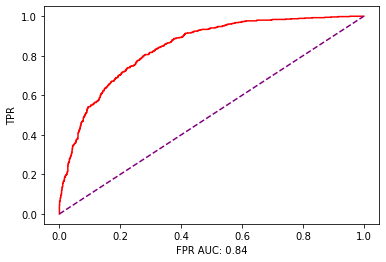

In [189]:
roc(y_test,y_pred_prob)

In [190]:
from imblearn.over_sampling import SMOTE

In [191]:
over_samp = SMOTE()

In [192]:
x_train_os , y_train_os = over_samp.fit_resample(x_train , y_train)

In [193]:
y_train_os.value_counts()

0    3618
1    3618
Name: Churn, dtype: int64

## now applying logistic regression

In [194]:
from sklearn.linear_model import LogisticRegression

In [195]:
model_lr = LogisticRegression()

In [196]:
model_lr.fit(x_train_os , y_train_os)

LogisticRegression()

In [197]:
y_pred_lr = model_lr.predict(x_test)

In [198]:
scores(y_test ,y_pred_lr)

Confusion Metrics:
 [[1160  396]
 [ 130  427]]
Accuracy:  0.7510648367250355
Recall:  0.7666068222621185
Precision:  0.5188335358444714
F1 score:  0.618840579710145
Cohen kappa Score:  0.4440358197965303
Classification Summary:
               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1556
           1       0.52      0.77      0.62       557

    accuracy                           0.75      2113
   macro avg       0.71      0.76      0.72      2113
weighted avg       0.80      0.75      0.76      2113



In [199]:
y_pred_lr_prob = model_lr.predict_proba(x_test)[:,1]

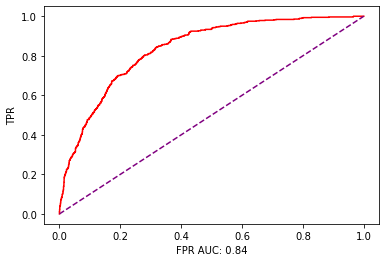

In [200]:
roc(y_test , y_pred_lr_prob)

## Decision Tree

In [201]:
from sklearn.tree import DecisionTreeClassifier , plot_tree

In [202]:
model_dt = DecisionTreeClassifier()

In [203]:
model_dt.fit(x_train_os , y_train_os)

DecisionTreeClassifier()

In [204]:
y_pred_dt = model_dt.predict(x_test)

In [205]:
scores(y_test , y_pred_dt)

Confusion Metrics:
 [[1178  378]
 [ 228  329]]
Accuracy:  0.7132039753904401
Recall:  0.5906642728904847
Precision:  0.46534653465346537
F1 score:  0.5205696202531646
Cohen kappa Score:  0.3200643148966087
Classification Summary:
               precision    recall  f1-score   support

           0       0.84      0.76      0.80      1556
           1       0.47      0.59      0.52       557

    accuracy                           0.71      2113
   macro avg       0.65      0.67      0.66      2113
weighted avg       0.74      0.71      0.72      2113



## random forest

In [206]:
from sklearn.ensemble import RandomForestClassifier

In [207]:
model_rf = RandomForestClassifier()

In [208]:
model_rf.fit(x_train_os , y_train_os)

RandomForestClassifier()

In [209]:
y_pred_rf=model_rf.predict(x_test)

In [210]:
scores(y_test , y_pred_rf)

Confusion Metrics:
 [[1274  282]
 [ 189  368]]
Accuracy:  0.7770941788925698
Recall:  0.6606822262118492
Precision:  0.5661538461538461
F1 score:  0.6097763048881525
Cohen kappa Score:  0.45505781937270673
Classification Summary:
               precision    recall  f1-score   support

           0       0.87      0.82      0.84      1556
           1       0.57      0.66      0.61       557

    accuracy                           0.78      2113
   macro avg       0.72      0.74      0.73      2113
weighted avg       0.79      0.78      0.78      2113



## gradient boosting

In [212]:
from sklearn.ensemble import GradientBoostingClassifier

In [213]:
model_gb = GradientBoostingClassifier()

In [214]:
model_gb.fit(x_train_os , y_train_os)

GradientBoostingClassifier()

In [215]:
y_pred_gb = model_gb.predict(x_test)

In [216]:
scores(y_test , y_pred_gb)

Confusion Metrics:
 [[1187  369]
 [ 130  427]]
Accuracy:  0.7638428774254614
Recall:  0.7666068222621185
Precision:  0.5364321608040201
F1 score:  0.631189948263119
Cohen kappa Score:  0.46536030565703834
Classification Summary:
               precision    recall  f1-score   support

           0       0.90      0.76      0.83      1556
           1       0.54      0.77      0.63       557

    accuracy                           0.76      2113
   macro avg       0.72      0.76      0.73      2113
weighted avg       0.81      0.76      0.77      2113



## CONCLUSION